In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/COLAB BB")

Mounted at /content/drive


**Dataset Asli**

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def tampilkan_gambar(daftar_gambar):
    fig, axs = plt.subplots(3, 4, figsize=(18, 18))
    for i in range(3):
        for j in range(4):
            idx = i * 4 + j
            if idx < len(daftar_gambar):
                axs[i, j].imshow(daftar_gambar[idx])
            axs[i, j].axis('off')
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)
    plt.show()

gambar_1 = plt.imread('Salinan ke-1.jpeg')
gambar_2 = plt.imread('Salinan ke-2.jpeg')
gambar_3 = plt.imread('Salinan ke-3.jpeg')
gambar_4 = plt.imread('Salinan ke-4.jpeg')
gambar_5 = plt.imread('Salinan ke-5.jpeg')
gambar_6 = plt.imread('Salinan ke-6.jpeg')
gambar_7 = plt.imread('Salinan ke-7.jpeg')
gambar_8 = plt.imread('Salinan ke-8.jpeg')
gambar_9 = plt.imread('Salinan ke-9.jpeg')
gambar_10 = plt.imread('Salinan ke-10.jpeg')

daftar_gambar = [gambar_1, gambar_2, gambar_3, gambar_4, gambar_5, gambar_6, gambar_7, gambar_8, gambar_9, gambar_10]
tampilkan_gambar(daftar_gambar)

Output hidden; open in https://colab.research.google.com to view.

**Tampilan Dataset Setelah melalui proses**


*   Cropping image
*   Mengubah bayangan dalam gambar



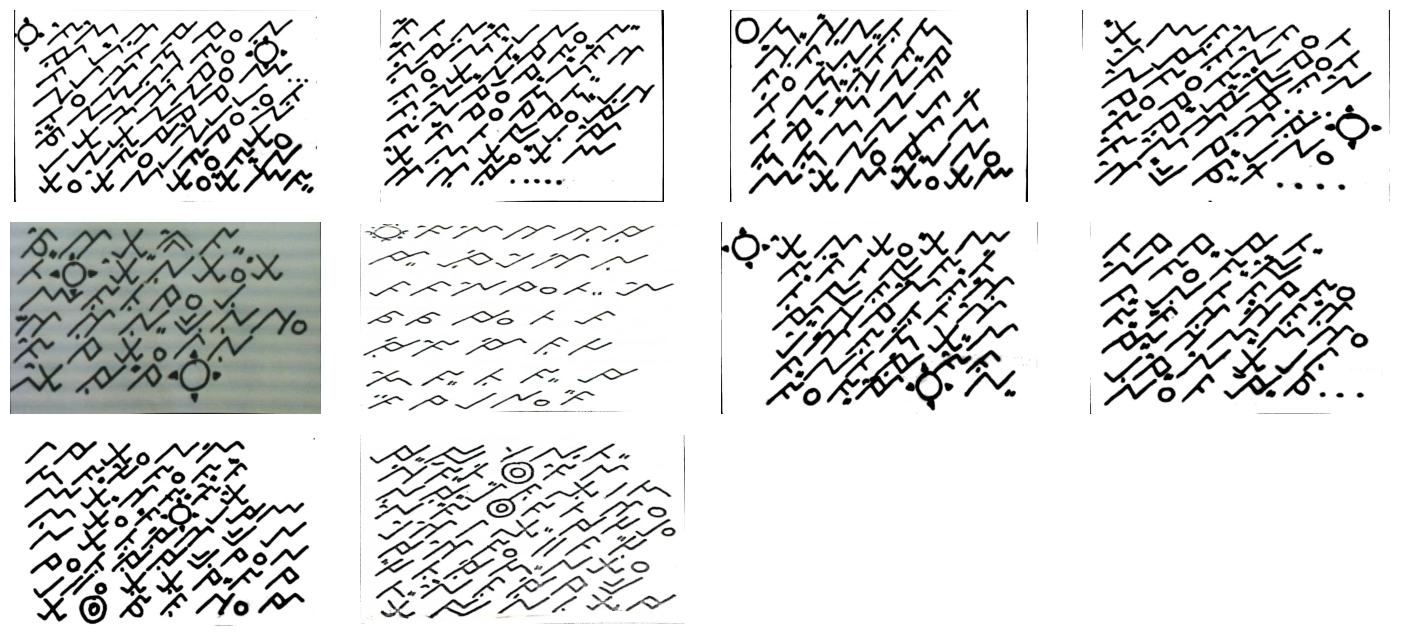

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def tampilkan_gambar(daftar_gambar):
    fig, axs = plt.subplots(3, 4, figsize=(18, 8))
    for i in range(3):
        for j in range(4):
            idx = i * 4 + j
            if idx < len(daftar_gambar):
                axs[i, j].imshow(daftar_gambar[idx])
            axs[i, j].axis('off')
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)
    plt.show()

gambar_1 = plt.imread('Hal1.jpg')
gambar_2 = plt.imread('Hal2.jpg')
gambar_3 = plt.imread('Hal3.jpg')
gambar_4 = plt.imread('Hal4.jpg')
gambar_5 = plt.imread('Hal5.jpg')
gambar_6 = plt.imread('Hal6.jpg')
gambar_7 = plt.imread('Hal7.jpg')
gambar_8 = plt.imread('Hal8.jpg')
gambar_9 = plt.imread('Hal9.jpg')
gambar_10 = plt.imread('Hal10.jpg')

daftar_gambar = [gambar_1, gambar_2, gambar_3, gambar_4, gambar_5, gambar_6, gambar_7, gambar_8, gambar_9, gambar_10]
tampilkan_gambar(daftar_gambar)

**Pre-processing**
- Warna ke Biner
- Thresholding

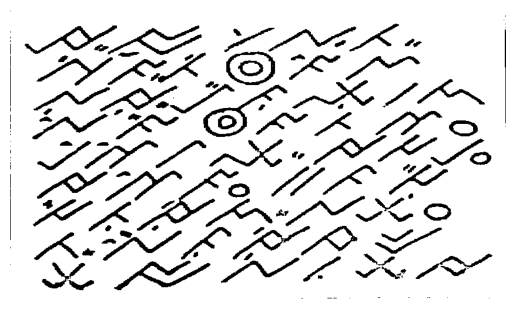

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def ubah_ke_biner(gambar, threshold):
    img = cv2.imread(gambar, cv2.IMREAD_GRAYSCALE)
    _, biner = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    return biner

def tampilkan_gambar(gambar):
    plt.imshow(gambar.astype('float32'), cmap='gray')
    plt.axis('off')
    plt.show()

gambar_awal = 'Hal10.jpg'
threshold = 127

gambar_biner = ubah_ke_biner(gambar_awal, threshold)
tampilkan_gambar(gambar_biner)

**Resize**

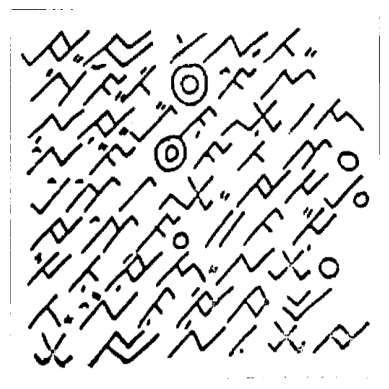

In [5]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt


# Resize citra
resized_image = cv2.resize(gambar_biner, (512, 512))

# Tampilkan citra hasil resize
plt.imshow(resized_image, cmap='gray')
plt.axis('off')
plt.show()

**Morfologi Citra**

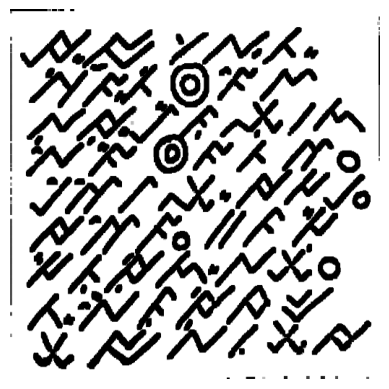

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Erosi
kernel = np.ones((4, 4), np.uint8)
eroded_image = cv2.erode(resized_image, kernel, iterations=1)

# Dilasi
#kernel = np.ones((3, 3), np.uint8)
#dilated_image = cv2.dilate(resized_image, kernel, iterations=1)

# Tampilkan citra hasil erosi dan dilasi
plt.imshow(eroded_image, cmap='gray')
#plt.imshow(dilated_image, cmap='gray')
plt.axis('off')
plt.show()

**Bounding Box**

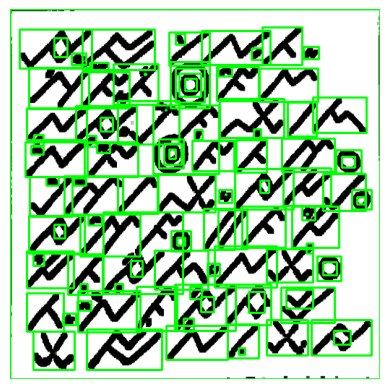

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mengasumsikan eroded_image adalah gambar sumber sebelum diresize

resized_image2 = cv2.resize(eroded_image, (512, 512))

# Convert gambar menjadi RGB agar kompatibel dengan matplotlib
resized_image2_rgb = cv2.cvtColor(resized_image2, cv2.COLOR_BGR2RGB)

# Find the contours in the image
contours, hierarchy = cv2.findContours(resized_image2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find the bounding boxes of the contours
bounding_boxes = [cv2.boundingRect(c) for c in contours]

# Draw the bounding boxes on the image with the desired color
for bounding_box in bounding_boxes:
    x, y, w, h = bounding_box
    cv2.rectangle(resized_image2_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Warna bounding box hijau

# Display the image with the bounding boxes
plt.imshow(resized_image2_rgb)
plt.axis('off')
plt.show()


**Hasil Segmentasi Bounding yang Telah Terpisah**

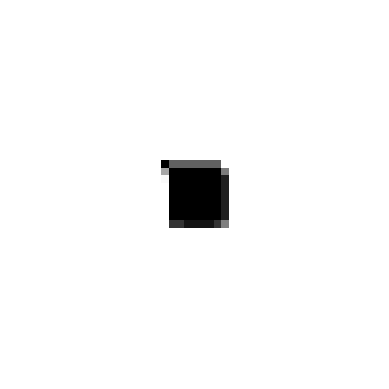

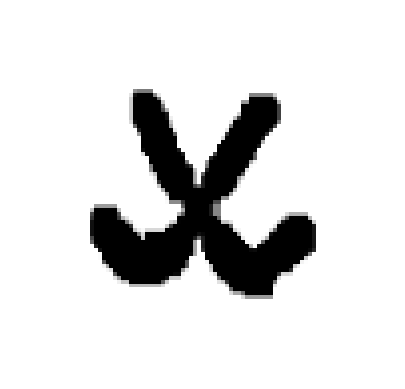

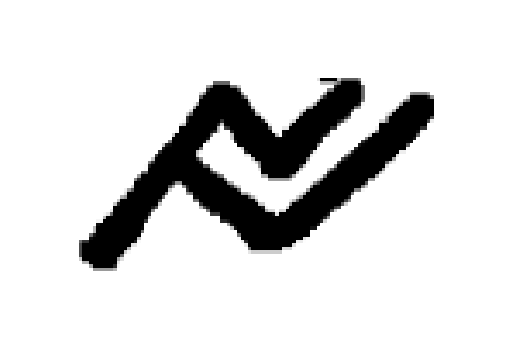

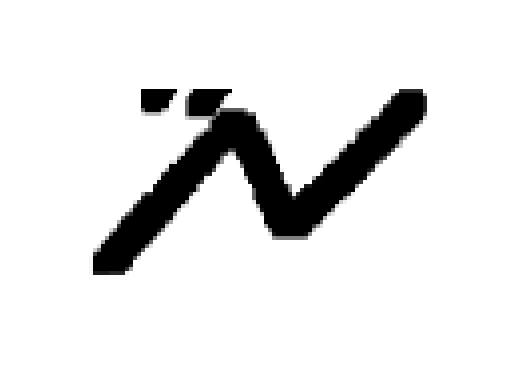

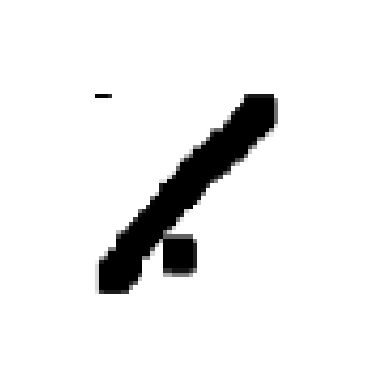

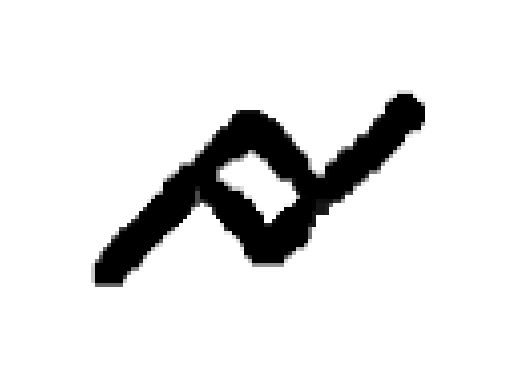

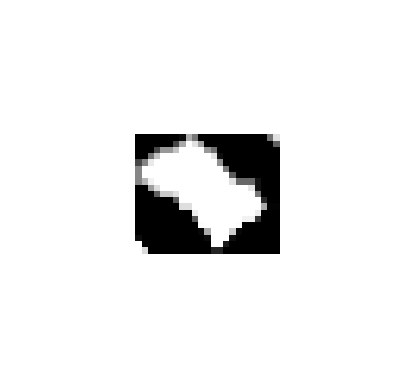

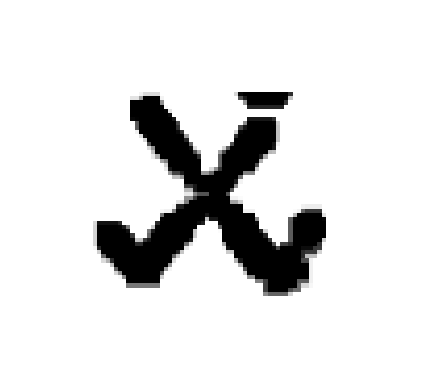

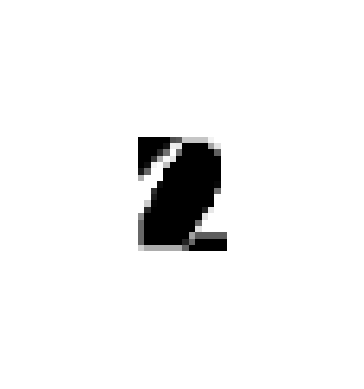

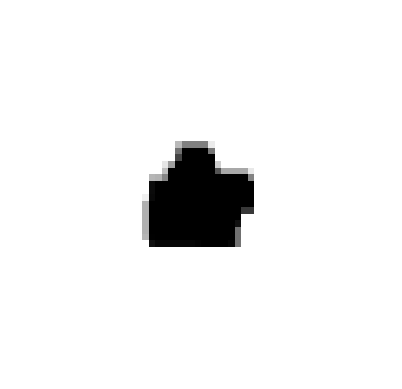

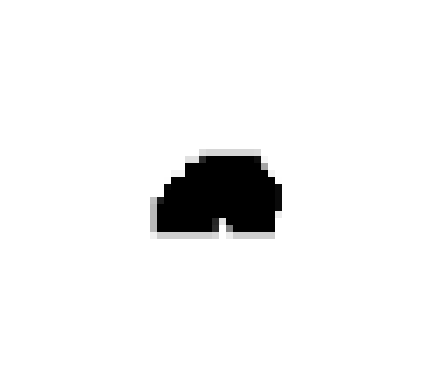

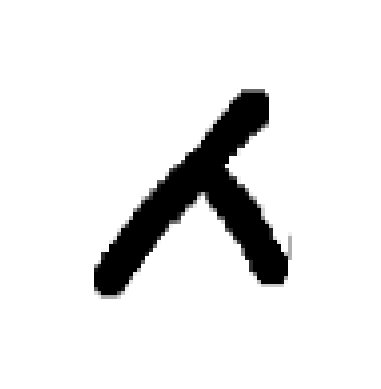

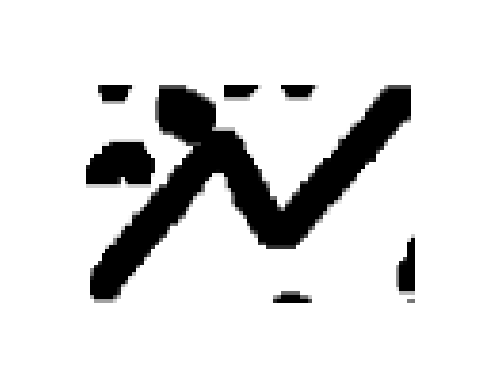

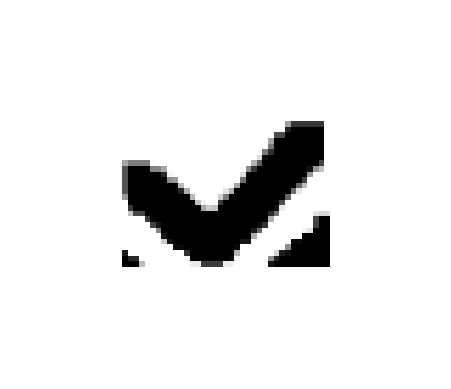

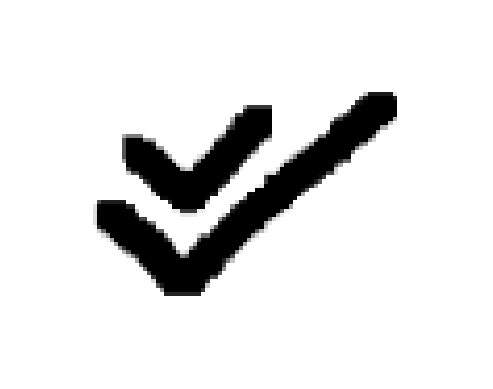

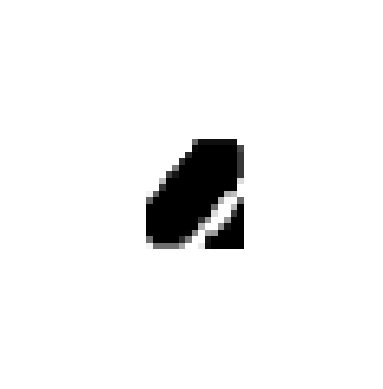

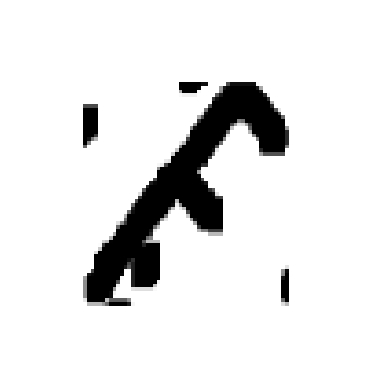

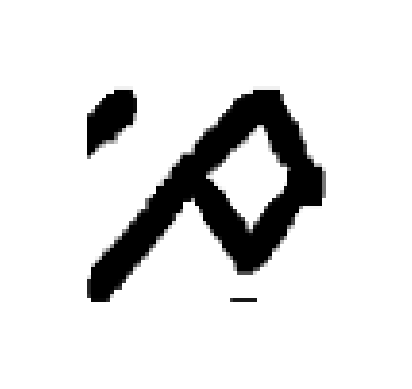

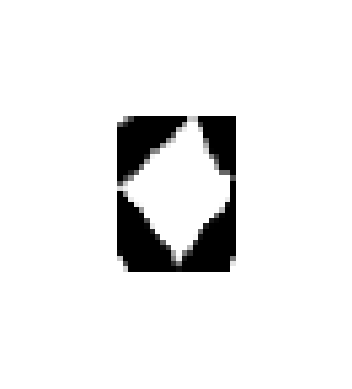

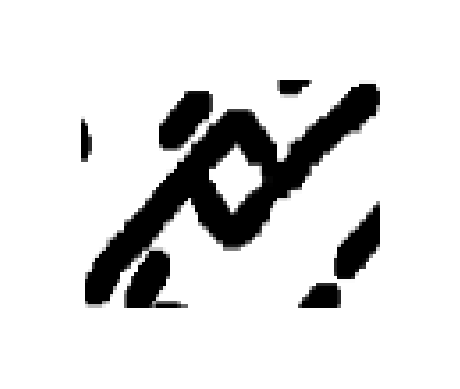

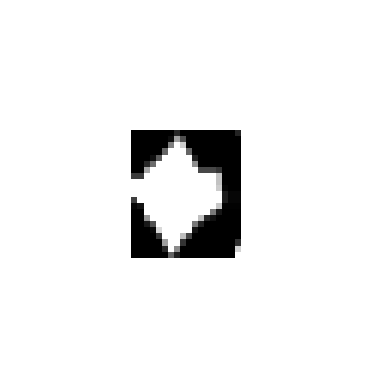

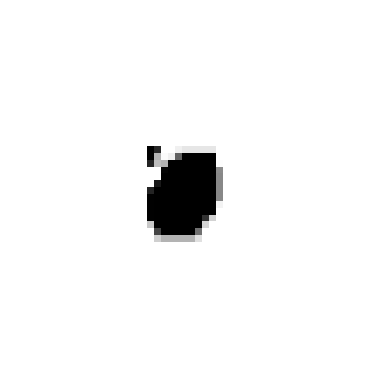

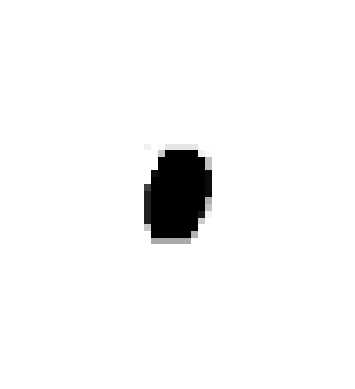

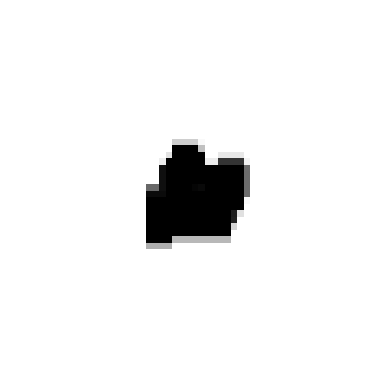

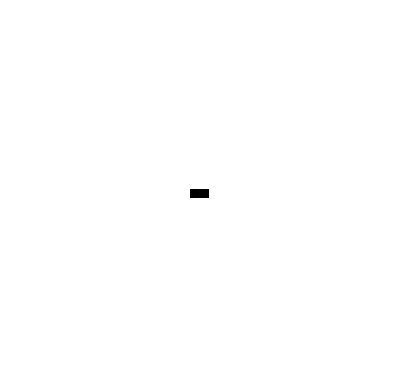

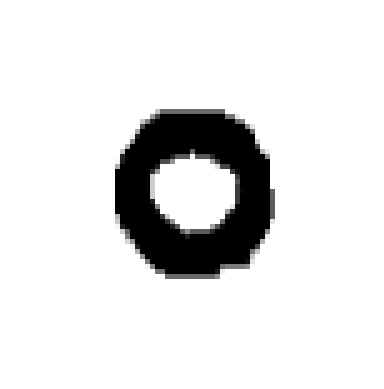

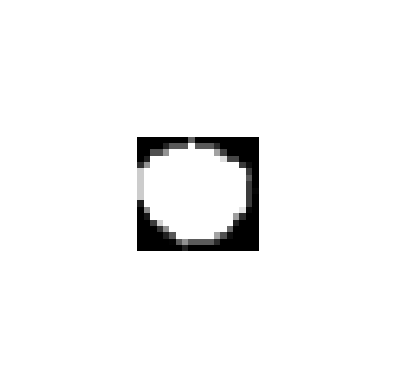

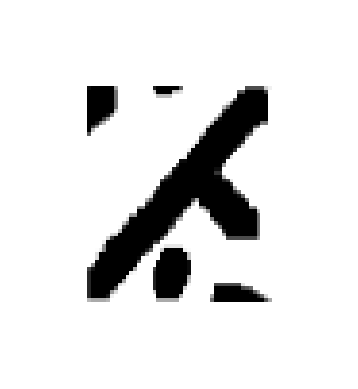

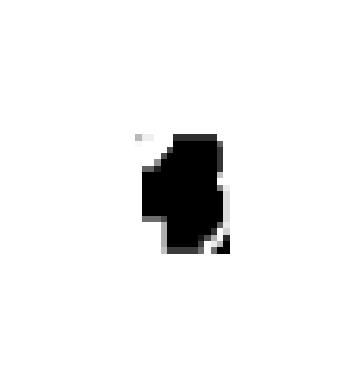

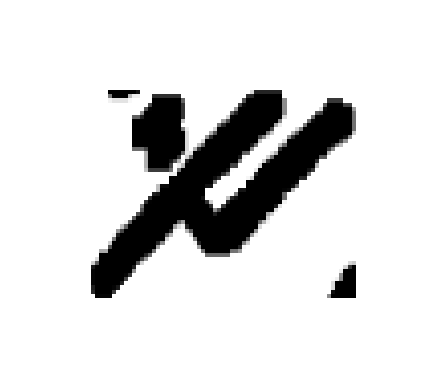

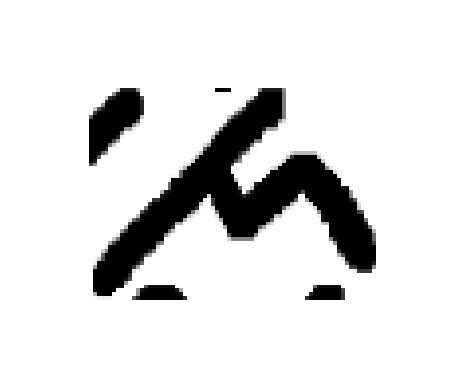

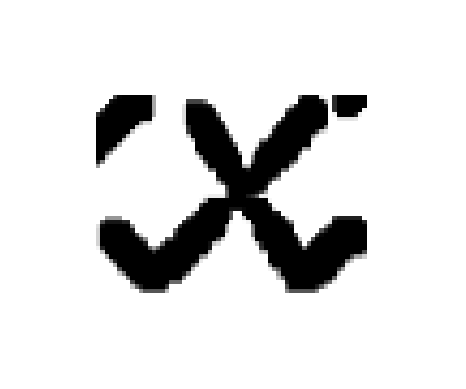

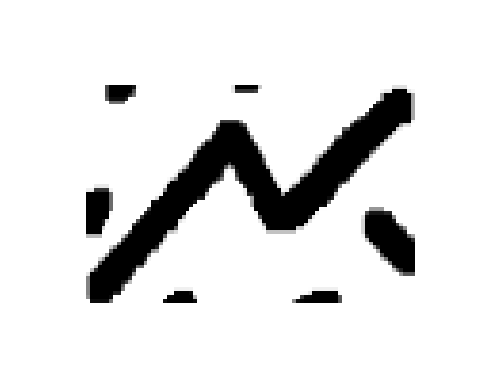

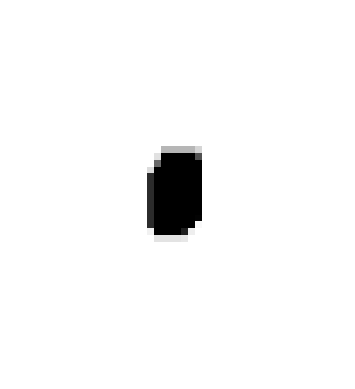

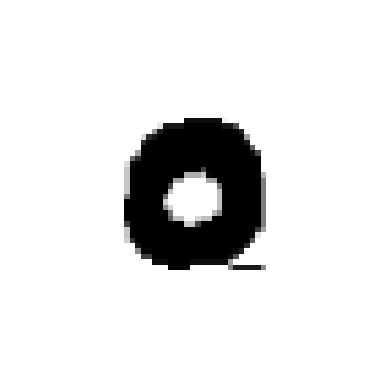

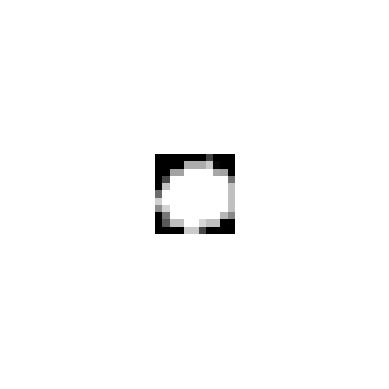

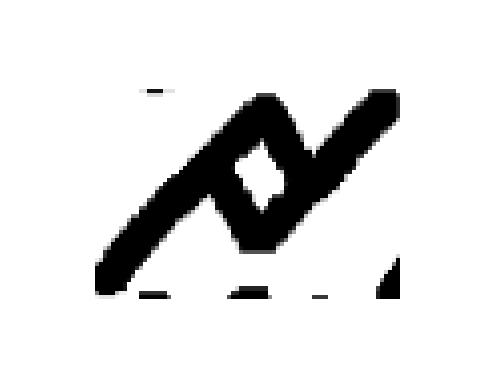

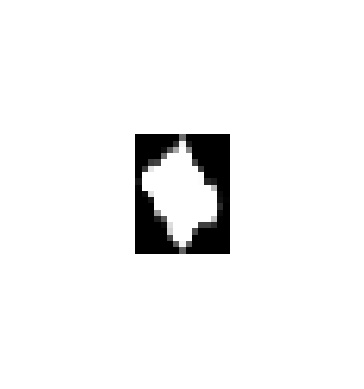

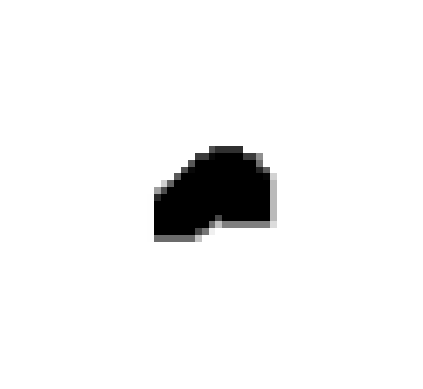

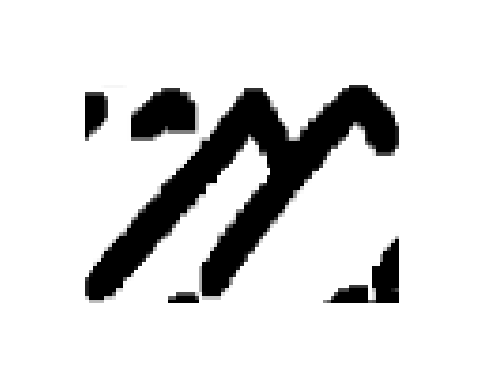

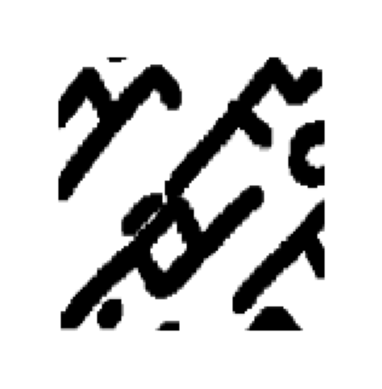

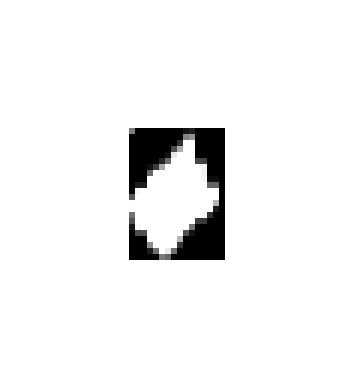

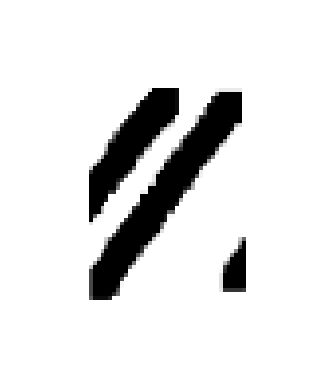

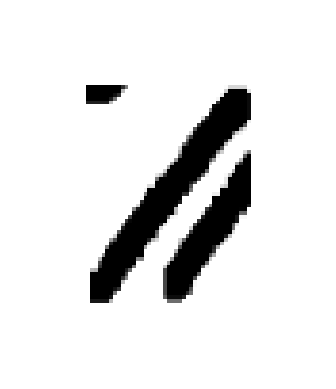

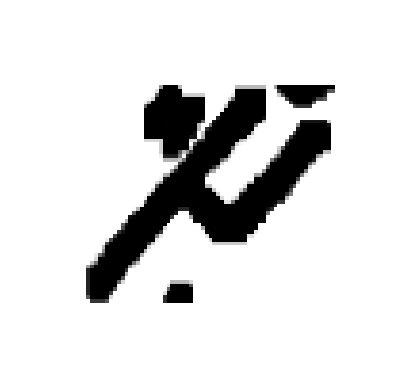

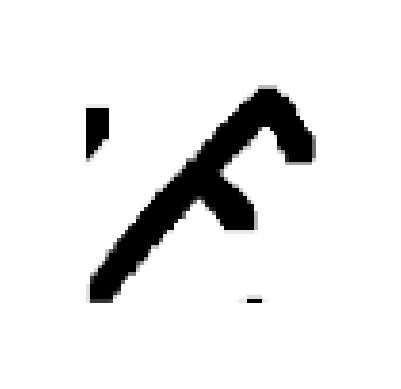

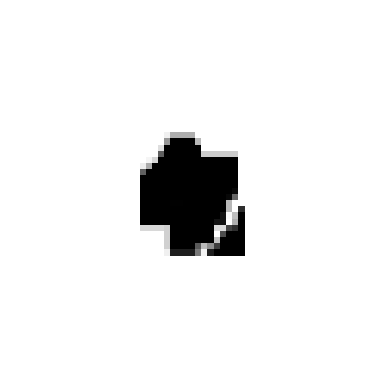

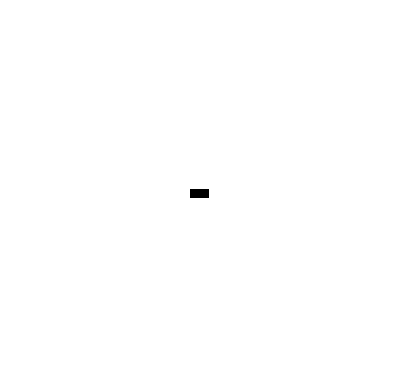

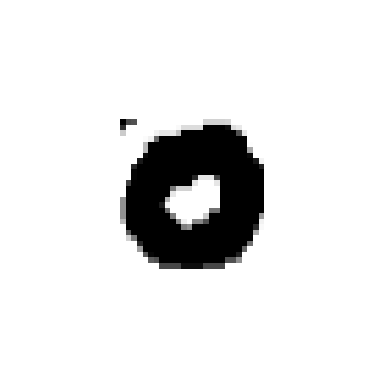

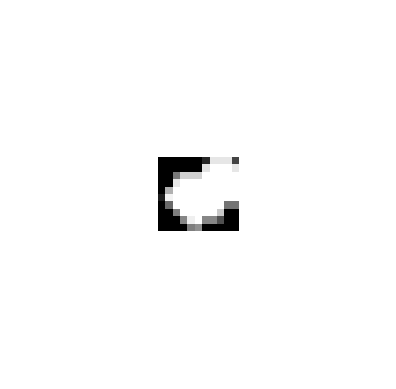

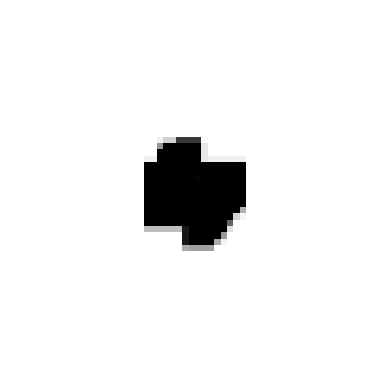

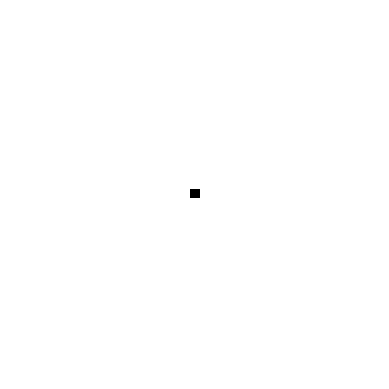

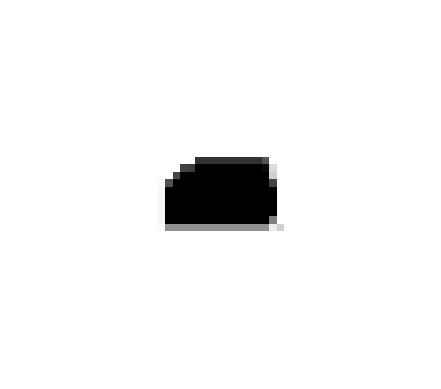

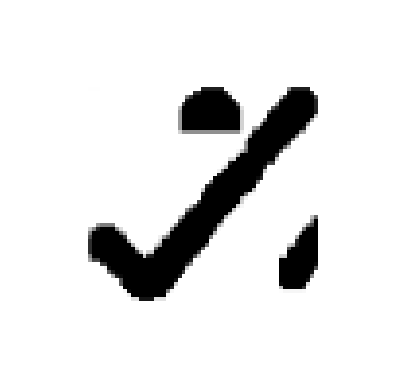

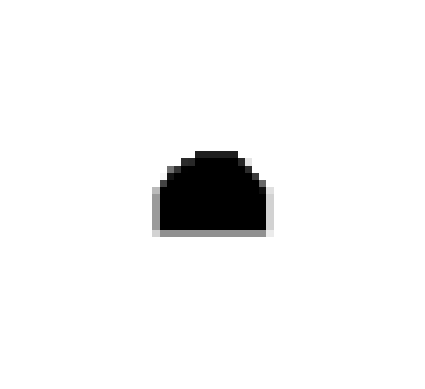

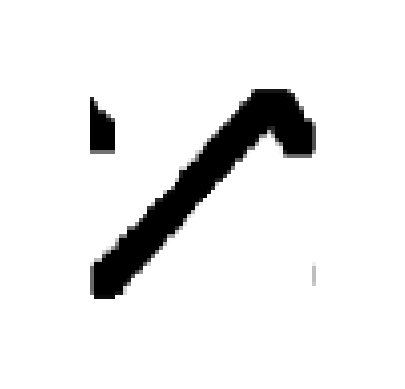

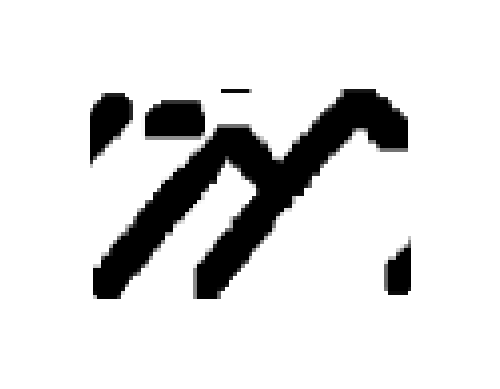

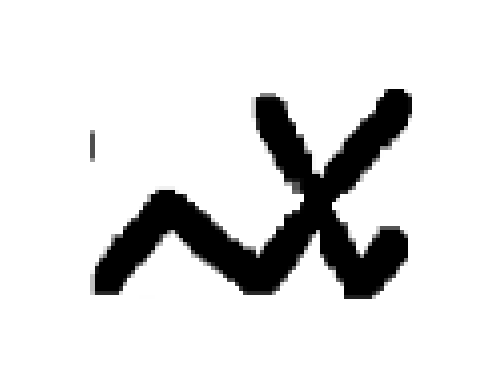

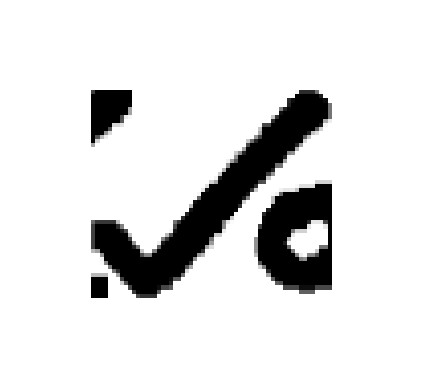

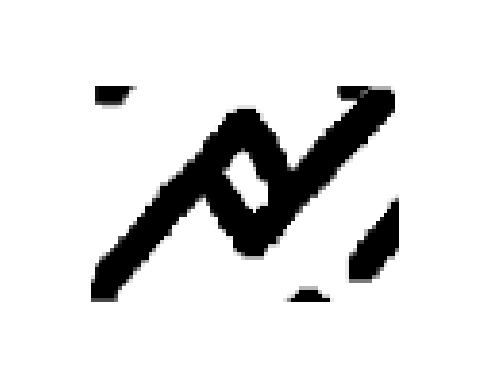

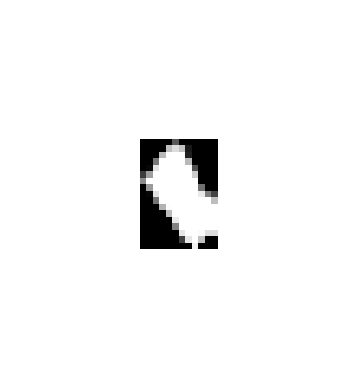

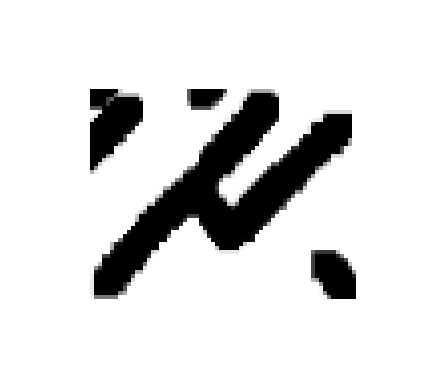

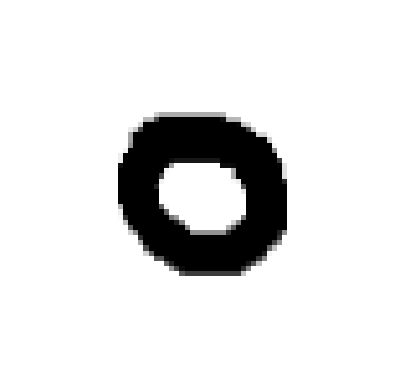

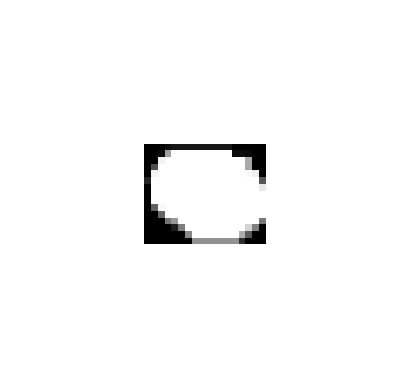

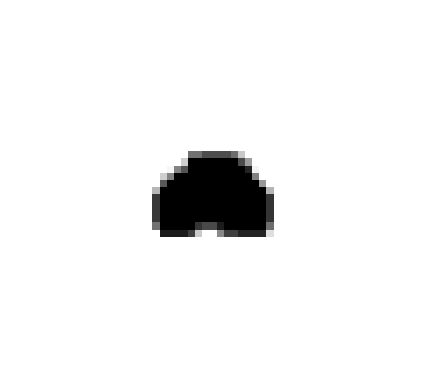

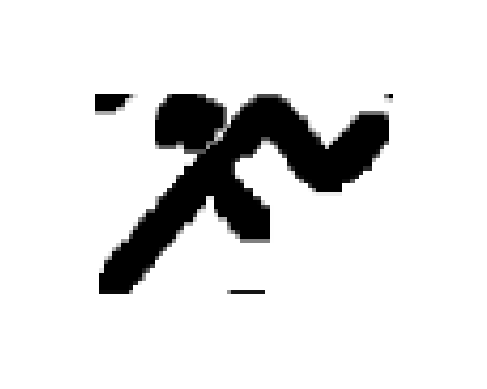

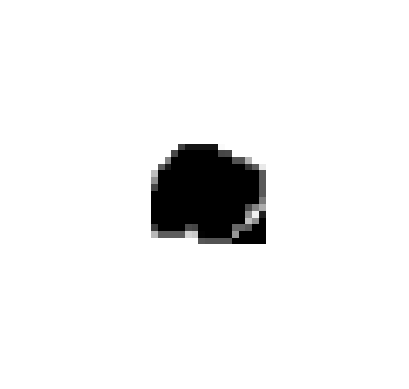

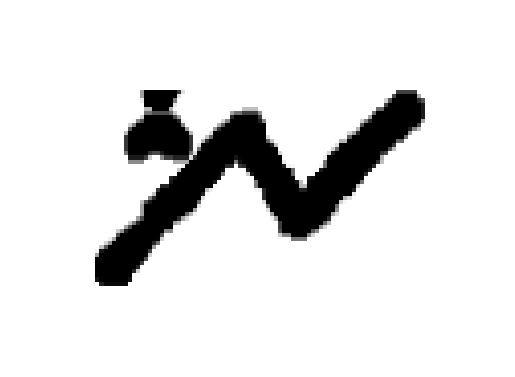

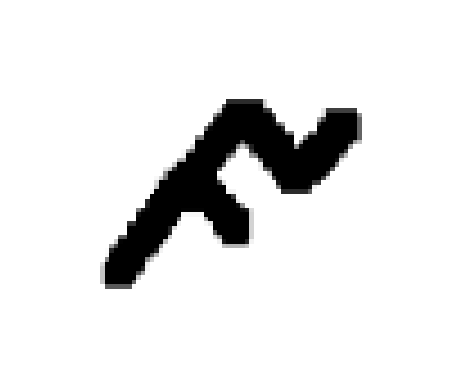

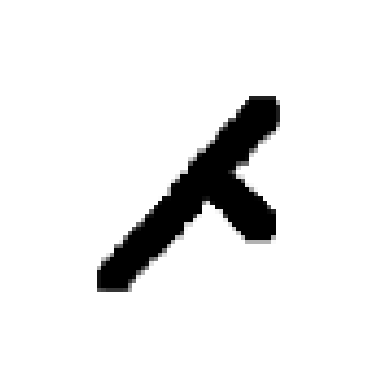

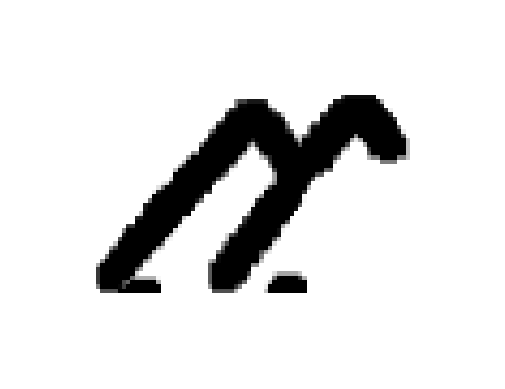

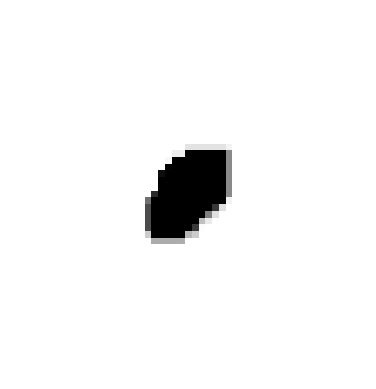

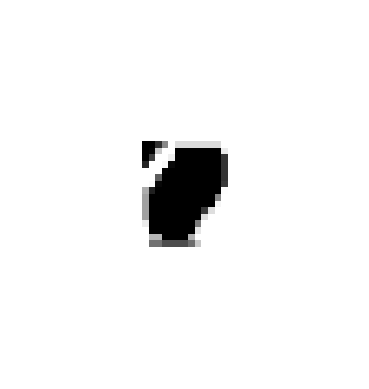

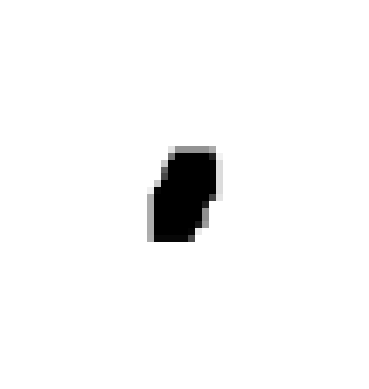

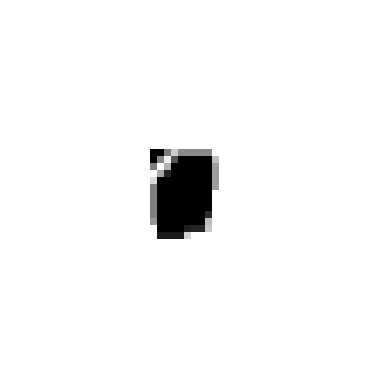

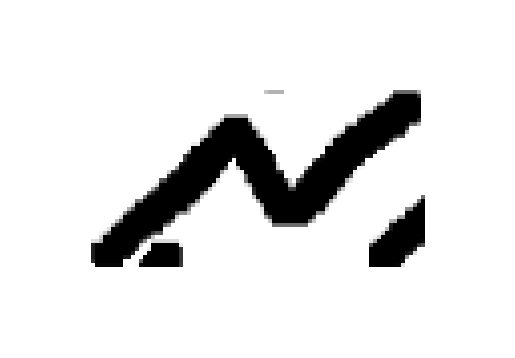

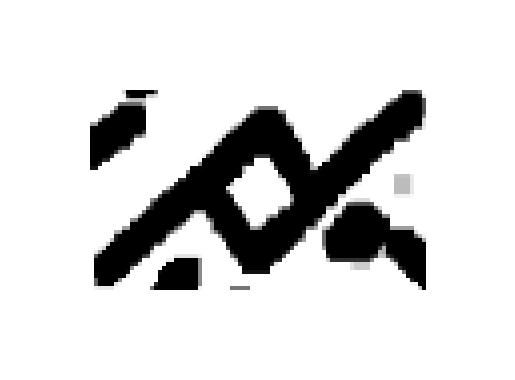

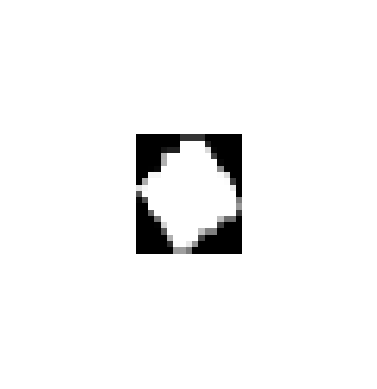

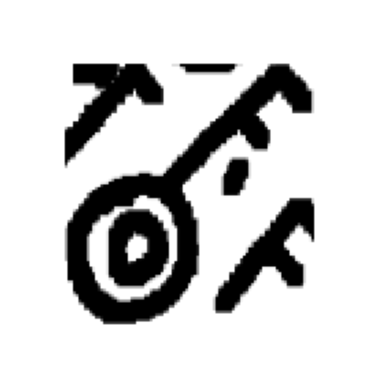

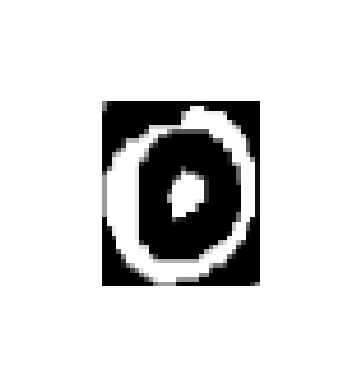

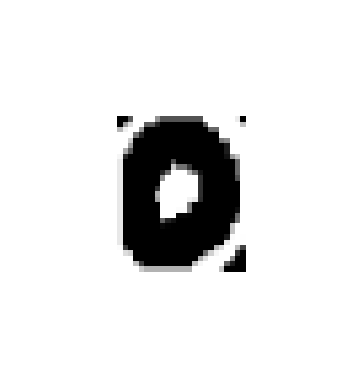

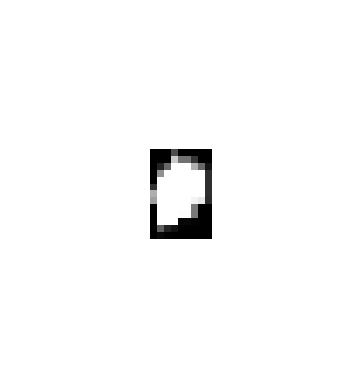

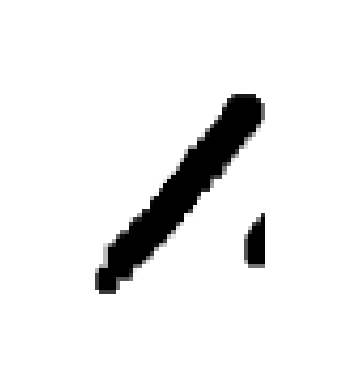

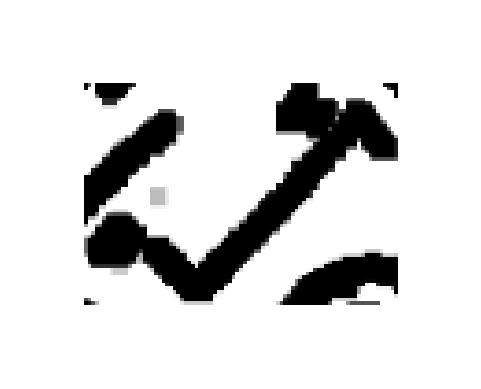

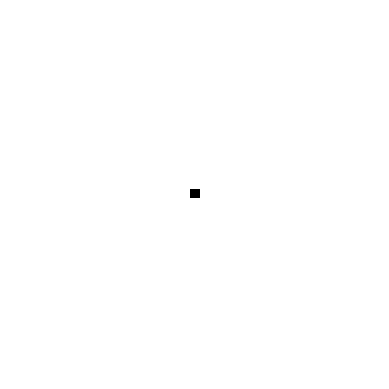

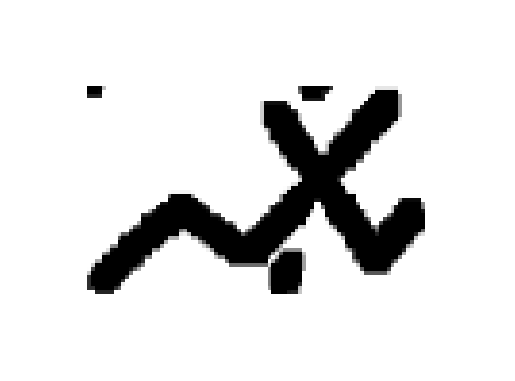

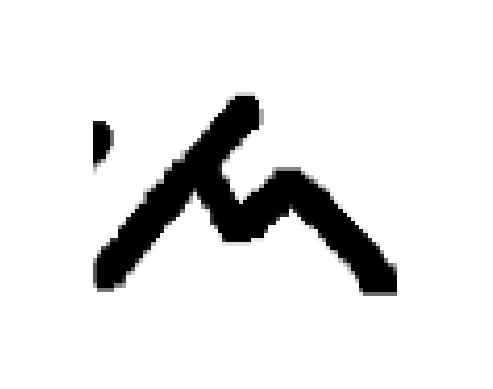

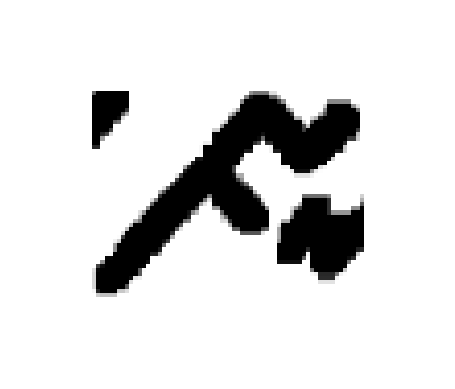

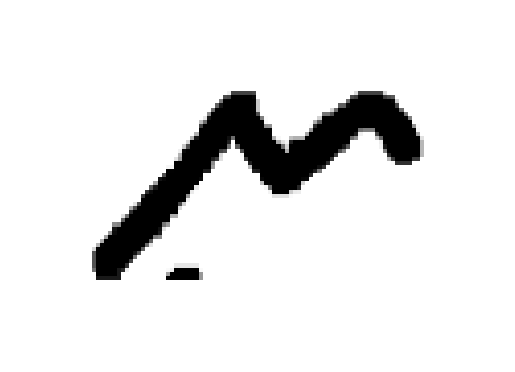

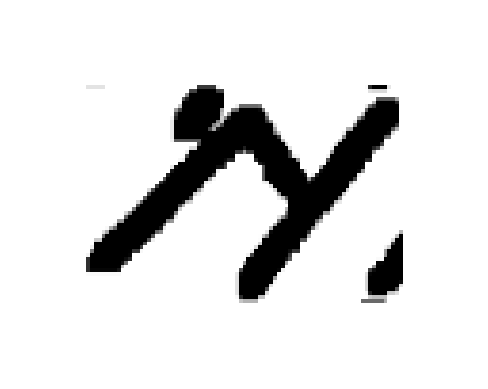

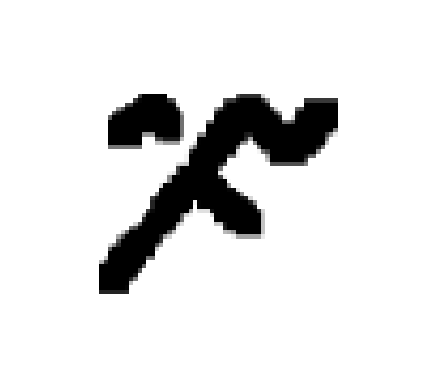

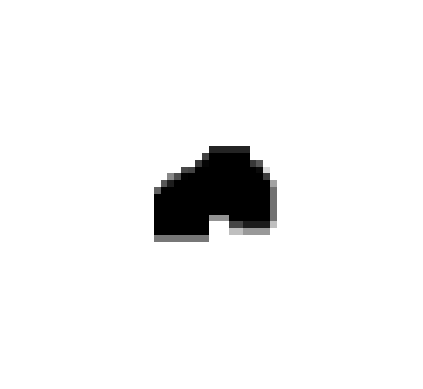

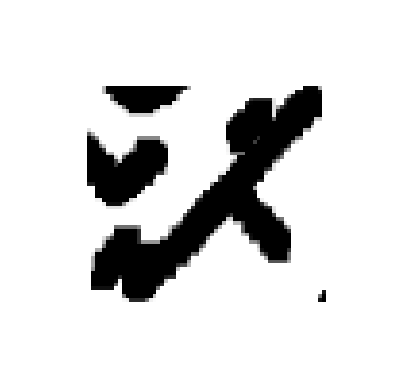

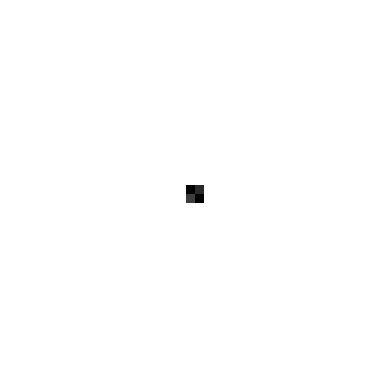

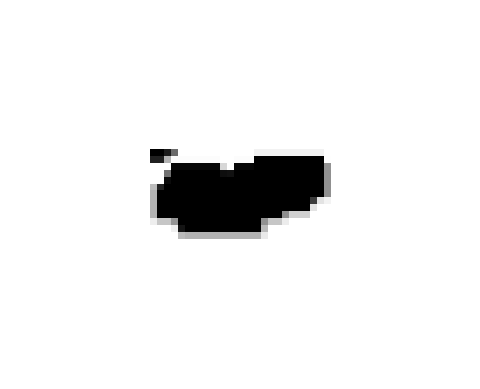

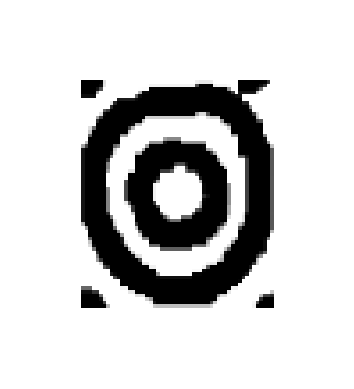

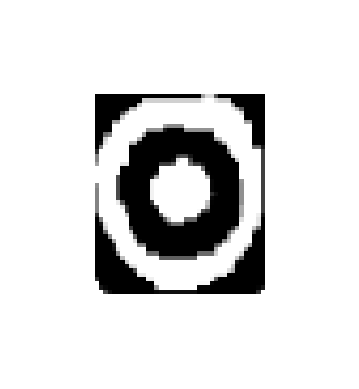

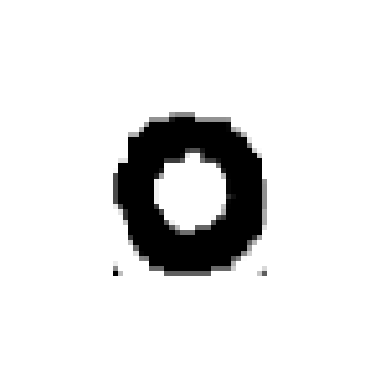

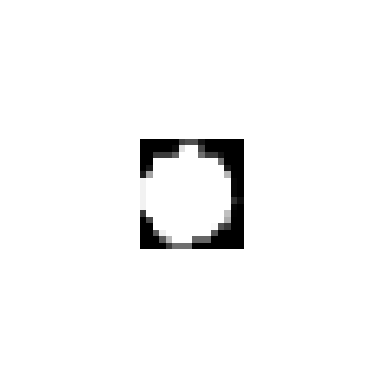

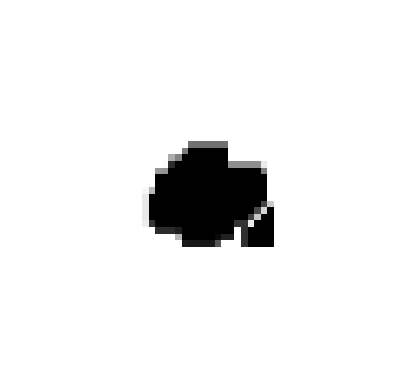

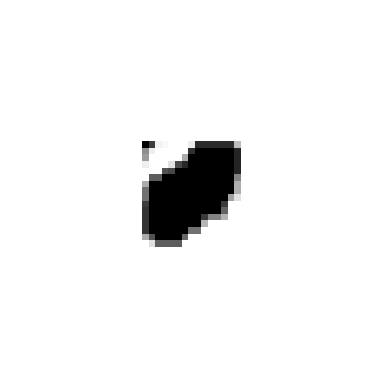

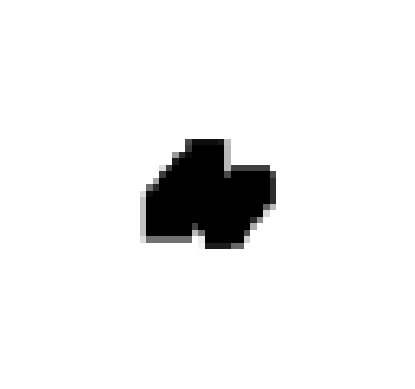

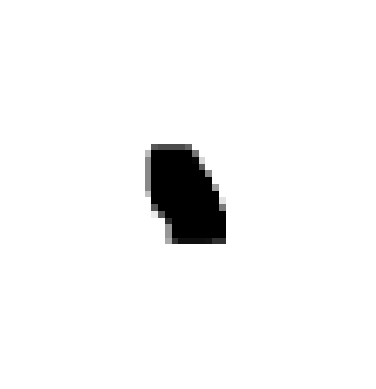

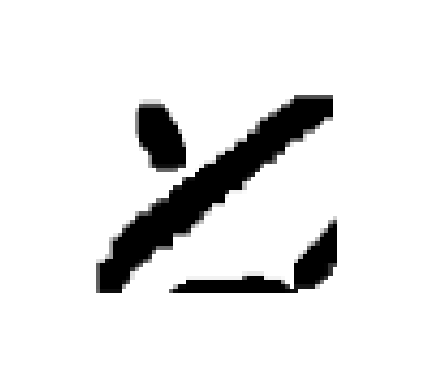

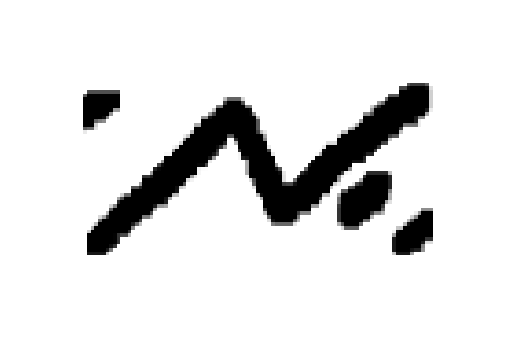

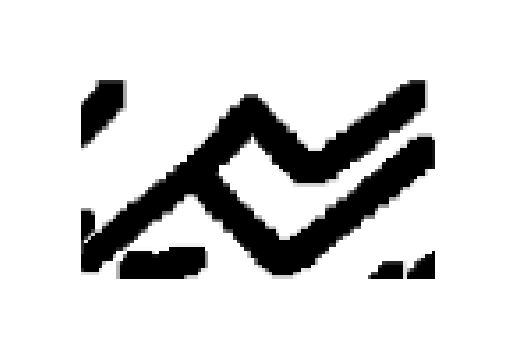

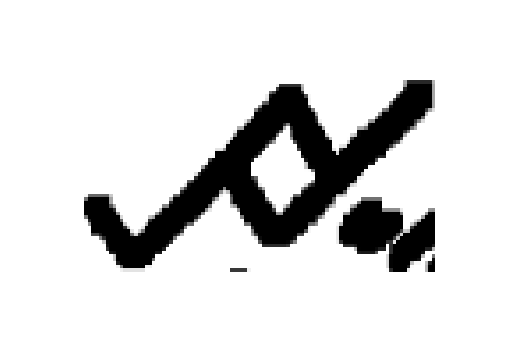

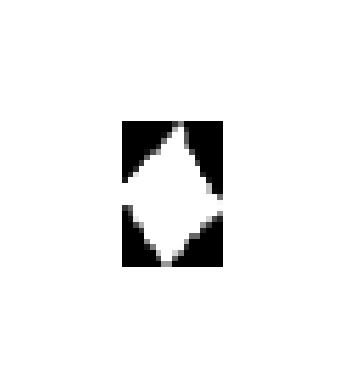

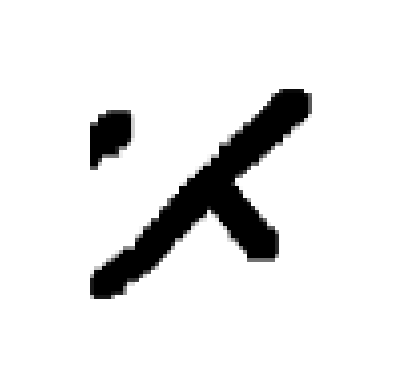

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cropped_images = []
padding = 20

for bounding_box in bounding_boxes:
    x, y, w, h = bounding_box
    cropped_image = eroded_image[y:y+h, x:x+w]

    # Determine the background color for padding
    background_color = np.mean(cropped_image)

    # Add padding to the cropped image with the background color
    padded_image = cv2.copyMakeBorder(cropped_image, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=255)

    cropped_images.append(padded_image)

    # Skip displaying the first output
    if bounding_box == bounding_boxes[0]:
        continue

    plt.imshow(padded_image, cmap='gray')
    plt.axis('off')
    plt.show()


**Jumlah Hasil Segmentasi Bounding Box yang Telah Terpisah**

In [9]:
num_segmented = len(cropped_images)
print("Jumlah hasil segmentasi yang tercrop: ", num_segmented)

Jumlah hasil segmentasi yang tercrop:  110


**Tingkat Akurasi Hasil Segmentasi Bounding Box Secara Keseluruhan**

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_accuracy(segmented_image, ground_truth):
    # Hitung jumlah piksel yang sama antara hasil segmentasi dan ground truth
    intersection = cv2.bitwise_and(segmented_image, ground_truth)
    intersection_pixels = np.count_nonzero(intersection)

    # Hitung jumlah piksel yang ada di hasil segmentasi dan ground truth
    union = cv2.bitwise_or(segmented_image, ground_truth)
    union_pixels = np.count_nonzero(union)

    # Hitung tingkat akurasi
    accuracy = intersection_pixels / union_pixels * 100
    return accuracy

# Load ground truth
ground_truth = cv2.imread('Hal10.jpg', cv2.IMREAD_GRAYSCALE)

# Inisialisasi list untuk menyimpan tingkat akurasi segmentasi tiap cropped image
accuracies = []

# Crop dan hitung tingkat akurasi segmentasi untuk setiap cropped image
for i, cropped_image in enumerate(cropped_images):
    # Resize cropped image untuk sesuaikan ukuran dengan ground truth
    resized_cropped_image = cv2.resize(cropped_image, (ground_truth.shape[1], ground_truth.shape[0]))

    # Hitung tingkat akurasi segmentasi
    accuracy = calculate_accuracy(resized_cropped_image, ground_truth)
    accuracies.append(accuracy)

    # Melewati hasil output pertama kali
    if i == 0:
        continue

    # Tampilkan cropped image dan tingkat akurasi segmentasi
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(resized_cropped_image, cmap='gray')
    plt.axis('off')
    plt.title('Cropped Image')
    plt.subplot(1, 2, 2)
    plt.imshow(ground_truth, cmap='gray')
    plt.axis('off')
    plt.title('Ground Truth')
    plt.show()

# Tampilkan tingkat akurasi segmentasi untuk setiap cropped image
for i, accuracy in enumerate(accuracies):
    print("Tingkat akurasi segmentasi ke-{}: {:.2f}%".format(i+1, accuracy))

# Hitung rata-rata tingkat akurasi segmentasi
average_accuracy = np.mean(accuracies)

# Tampilkan rata-rata tingkat akurasi segmentasi
print("Rata-rata tingkat akurasi segmentasi: {:.2f}%".format(average_accuracy))


Output hidden; open in https://colab.research.google.com to view.

Metode yang digunakan untuk menghitung tingkat akurasi hasil segmentasi bounding box adalah calculate_accuracy. Metode ini menghitung persentase kesamaan antara hasil segmentasi (masked_image) dengan ground truth (ground_truth) menggunakan operasi bitwise AND dan bitwise OR. Persentase kesamaan ini merupakan metrik untuk mengukur tingkat akurasi segmentasi bounding box.